In [1]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import sklearn.metrics       as Metrics


In [21]:
customer = pd.read_csv('data/olist_customers_dataset.csv', delimiter=',') 
geolocation=pd.read_csv('data/olist_geolocation_dataset.csv', delimiter=',') 
order_items=pd.read_csv('data/olist_order_items_dataset.csv', delimiter=',') 
order_payments=pd.read_csv('data/olist_order_payments_dataset.csv', delimiter=',') 
order_reviews=pd.read_csv('data/olist_order_reviews_dataset.csv', delimiter=',') 
orders=pd.read_csv('data/olist_orders_dataset.csv', delimiter=',') 
products=pd.read_csv('data/olist_products_dataset.csv', delimiter=',') 
sellers=pd.read_csv('data/olist_sellers_dataset.csv', delimiter=',') 
category=pd.read_csv('data/product_category_name_translation.csv', delimiter=',') 

In [22]:
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [23]:
tam=customer['customer_unique_id'].size
print("Customer")
print("Customer size:", tam)
print("Columns: ", customer.columns)
print("Customer State: ",customer.customer_state.unique())
#customer.describe()

Customer
Customer size: 99441
Columns:  Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')
Customer State:  ['SP' 'SC' 'MG' 'PR' 'RJ' 'RS' 'PA' 'GO' 'ES' 'BA' 'MA' 'MS' 'CE' 'DF' 'RN'
 'PE' 'MT' 'AM' 'AP' 'AL' 'RO' 'PB' 'TO' 'PI' 'AC' 'SE' 'RR']


SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_state, dtype: int64


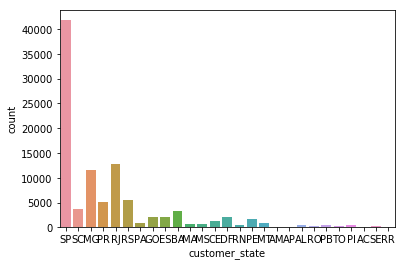

In [24]:
print(customer['customer_state'].value_counts())
sns.countplot(x= 'customer_state', data=customer)

In [25]:
customer.isna().any()

customer_id                 False
customer_unique_id          False
customer_zip_code_prefix    False
customer_city               False
customer_state              False
dtype: bool

In [26]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [27]:
print("Geolocation")
print("geolocation size:", geolocation.size)
print("Columns: ", geolocation.columns)

#geolocation.describe()

Geolocation
geolocation size: 5000815
Columns:  Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')


SP    404268
MG    126336
RJ    121169
RS     61851
PR     57859
SC     38328
BA     36045
GO     20139
ES     16748
PE     16432
DF     12986
MT     12031
CE     11674
PA     10853
MS     10431
MA      7853
PB      5538
RN      5041
PI      4549
AL      4183
TO      3576
SE      3563
RO      3478
AM      2432
AC      1301
AP       853
RR       646
Name: geolocation_state, dtype: int64


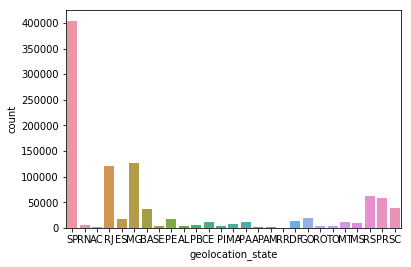

In [28]:
print(geolocation['geolocation_state'].value_counts())
sns.countplot(x= 'geolocation_state', data=geolocation)

In [29]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [30]:
print("Orders: ")
print("Columns: ", orders.columns)
print("Orders Size: ", orders.order_id.size)
orders.describe()

Orders: 
Columns:  Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')
Orders Size:  99441


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,f1c5e5967b0cd0144bd3b56958f7da43,6ec53a01c735a94d14637d30fd68ca37,delivered,2018-03-31 15:08:21,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-07-24 21:36:42,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [31]:
orders.isna().any()

order_id                         False
customer_id                      False
order_status                     False
order_purchase_timestamp         False
order_approved_at                 True
order_delivered_carrier_date      True
order_delivered_customer_date     True
order_estimated_delivery_date    False
dtype: bool

In [32]:
orders['order_purchase']=pd.to_datetime(orders['order_purchase_timestamp'])

In [33]:
orders.set_index('order_purchase',inplace=False)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
order_purchase,,,,,,,,
2017-10-02 10:56:33,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
2018-07-24 20:41:37,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2018-08-08 08:38:49,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
2017-11-18 19:28:06,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
2018-02-13 21:18:39,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
2017-07-09 21:57:05,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
2017-04-11 12:22:08,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
2017-05-16 13:10:30,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
2017-01-23 18:29:09,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00


In [35]:
orders.groupby(pd.Grouper(freq='M')).agg({'customer_id':'count'}).plot()
orders.groupby(pd.Grouper(freq='M')).agg({'customer_id':'count'}).plot(kind='bar')

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [36]:
orders['HOUR']=pd.to_datetime(orders['order_purchase_timestamp']).dt.hour

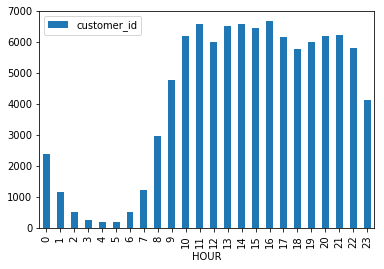

In [37]:
orders.groupby(orders['HOUR']).agg({'customer_id':'count'}).plot(kind='bar') 

In [38]:
'''plt.figure(figsize=(6,4))
sns.distplot(orders['HOUR'])
plt.title('Purchase Hours')
plt.show()'''

"plt.figure(figsize=(6,4))\nsns.distplot(orders['HOUR'])\nplt.title('Purchase Hours')\nplt.show()"

In [39]:
orders['WEEK_DAY']=pd.to_datetime(orders['order_purchase_timestamp']).dt.weekday

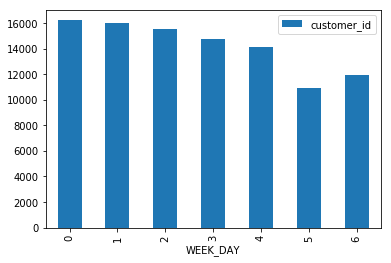

In [40]:
orders.groupby(orders['WEEK_DAY']).agg({'customer_id':'count'}).plot(kind='bar') 

In [41]:
orders.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64


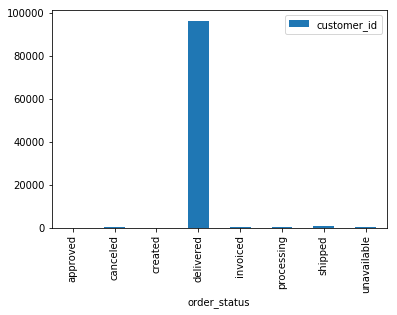

In [42]:
print(orders['order_status'].value_counts())
orders.groupby(orders['order_status']).agg({'customer_id':'count'}).plot(kind='bar') 

In [43]:
efective_orders=orders[(orders.order_status!= 'canceled') & (orders.order_status!= 'unavailable')]

In [44]:
print(efective_orders['order_status'].value_counts())

delivered     96478
shipped        1107
invoiced        314
processing      301
created           5
approved          2
Name: order_status, dtype: int64


In [45]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [46]:
print("Payments: ")
print("Columns: ", order_payments.columns)
print("Payments Size: ", order_payments.order_id.size)
order_payments.describe()

Payments: 
Columns:  Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')
Payments Size:  103886


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [47]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(y=order_payments["payment_value"])

#sns.boxplot(x="day", y="total_bill", data=order_payments)

AttributeError: module 'seaborn' has no attribute 'set_theme'

In [48]:
efective_orders.reset_index(drop=True)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase,HOUR,WEEK_DAY
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-02 10:56:33,10,0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-24 20:41:37,20,1
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-08 08:38:49,8,2
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11-18 19:28:06,19,5
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02-13 21:18:39,21,1
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00,2017-07-09 21:57:05,21,6
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00,2017-04-11 12:22:08,12,1
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00,2017-05-16 13:10:30,13,1
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00,2017-01-23 18:29:09,18,0
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00,2017-07-29 11:55:02,11,5


In [49]:
efective_orders.set_index('order_id')

,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase,HOUR,WEEK_DAY
order_id,,,,,,,,,,
e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-02 10:56:33,10,0
53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-24 20:41:37,20,1
47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-08 08:38:49,8,2
949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11-18 19:28:06,19,5
ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02-13 21:18:39,21,1
a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00,2017-07-09 21:57:05,21,6
136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00,2017-04-11 12:22:08,12,1
6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00,2017-05-16 13:10:30,13,1
76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00,2017-01-23 18:29:09,18,0


In [50]:
order_payments.set_index('order_id')

,payment_sequential,payment_type,payment_installments,payment_value
order_id,,,,
b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09


In [51]:
#payment_orders= pd.concat([order_payments,efective_orders], axis=1)
payment_orders=pd.merge(order_payments, efective_orders)

In [52]:
payment_orders.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase,HOUR,WEEK_DAY
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,2018-04-25 22:01:49,22,2
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00,2018-06-26 11:01:38,11,1
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00,2017-12-12 11:19:55,11,1
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,2017-12-06 12:04:06,12,2
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13 00:00:00,2018-05-21 13:59:17,13,0


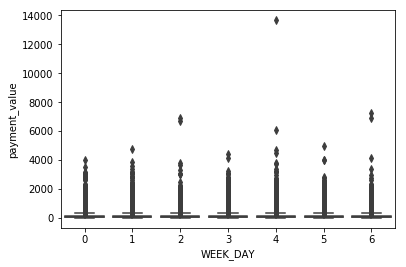

In [53]:
sns.boxplot(x=payment_orders['WEEK_DAY'], y=payment_orders["payment_value"])

In [54]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [55]:
print("Products: ")
print("Columns: ", products.columns)
print("Products Size: ", products.product_id.size)
products.describe()

Products: 
Columns:  Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_length', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')
Products Size:  32951


,product_name_lenght,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [56]:
products.groupby('product_category_name').size().sort_values(ascending=False).head(20)

product_category_name
cama_mesa_banho                      3029
esporte_lazer                        2867
moveis_decoracao                     2657
beleza_saude                         2444
utilidades_domesticas                2335
automotivo                           1900
informatica_acessorios               1639
brinquedos                           1411
relogios_presentes                   1329
telefonia                            1134
bebes                                 919
perfumaria                            868
fashion_bolsas_e_acessorios           849
papelaria                             849
cool_stuff                            789
ferramentas_jardim                    753
pet_shop                              719
eletronicos                           517
construcao_ferramentas_construcao     400
eletrodomesticos                      370
dtype: int64

cama_mesa_banho                                  3029
esporte_lazer                                    2867
moveis_decoracao                                 2657
beleza_saude                                     2444
utilidades_domesticas                            2335
automotivo                                       1900
informatica_acessorios                           1639
brinquedos                                       1411
relogios_presentes                               1329
telefonia                                        1134
bebes                                             919
perfumaria                                        868
papelaria                                         849
fashion_bolsas_e_acessorios                       849
cool_stuff                                        789
ferramentas_jardim                                753
pet_shop                                          719
eletronicos                                       517
construcao_ferramentas_const

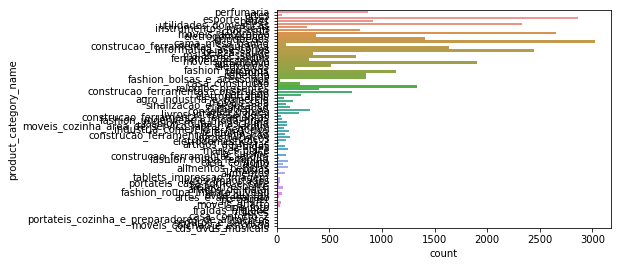

In [57]:
print(products['product_category_name'].value_counts())
sns.countplot(y= 'product_category_name', data=products)

In [58]:
payment_orders['order_purchase_timestamp']=pd.to_datetime(payment_orders['order_purchase_timestamp'], format='%Y%m%d hh:mm:ss')


ValueError: time data '2018-04-25 22:01:49' does not match format '%Y%m%d hh:mm:ss' (match)

In [79]:
import datetime
timesMonth=[]
timesYear=[]
for i in payment_orders['order_purchase_timestamp']:
    fecha=pd.to_datetime(i)
    timesMonth.append(fecha.month)
    timesYear.append(fecha.year)
payment_orders['Month']=timesMonth
payment_orders['Year']=timesYear
payment_orders.head()
# pd.datetime.now().year*100+pd.datetime.now().month

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase,HOUR,WEEK_DAY,Month,Year
2989,b5fee65bd894e490f09a8b389cce552e,1,credit_card,10,160.50,5bed8bf593c7bb615573667c79311ca3,delivered,2017-10-18 00:04:13,2017-10-18 00:14:27,2017-10-20 18:59:57,2017-11-03 21:27:38,2017-11-10 00:00:00,2017-10-18 00:04:13,0,2,10,2017
65764,790e4dbb16093464e8d8e26035df5523,1,credit_card,2,133.91,a57c51b6270226aab5e8ac92276ffa73,delivered,2018-07-30 00:47:05,2018-07-31 01:30:24,2018-07-31 13:27:00,2018-08-03 16:09:12,2018-08-16 00:00:00,2018-07-30 00:47:05,0,0,7,2018
55303,1955e6384cd6fc6cb02799b1e458b2d7,1,credit_card,4,85.81,ab2b0df51c890ff9bcae72f1abc72b79,delivered,2018-08-06 00:07:36,2018-08-06 00:24:14,2018-08-06 16:55:00,2018-08-07 20:14:20,2018-08-09 00:00:00,2018-08-06 00:07:36,0,0,8,2018
49453,8b1789e10f33bfc4af50c1e39aae50f7,1,credit_card,2,55.60,fba30b28beee38fcf673926812eca40c,delivered,2018-07-30 00:52:46,2018-07-30 01:04:18,2018-07-30 14:19:00,2018-07-31 19:21:18,2018-08-03 00:00:00,2018-07-30 00:52:46,0,0,7,2018
93749,2a61a7cf365db56cbf9fb72e2a422653,1,boleto,1,67.04,b1b136ceac7fc54316f2280cd040ed6b,delivered,2017-03-20 00:36:36,2017-03-20 00:36:36,2017-03-23 15:37:43,2017-03-31 18:15:51,2017-04-10 00:00:00,2017-03-20 00:36:36,0,0,3,2017


In [80]:
payment_orders.Month.unique()

array([10,  7,  8,  3,  2,  1,  5,  9,  6,  4, 11, 12])

In [ ]:
## Most people in Brazil E commerce use Credit_card  to pay their buys

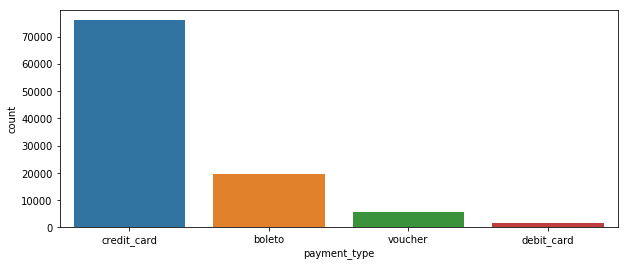

In [59]:
plt.figure(figsize=(10, 4))
sns.countplot('payment_type',data=payment_orders)

plt.show()

In [ ]:
## There is no relevant information in a generalline of time

<Figure size 720x360 with 0 Axes>

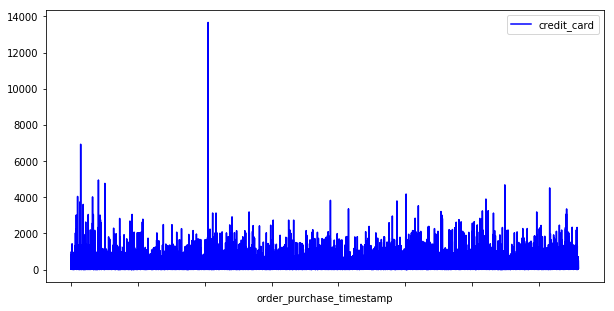

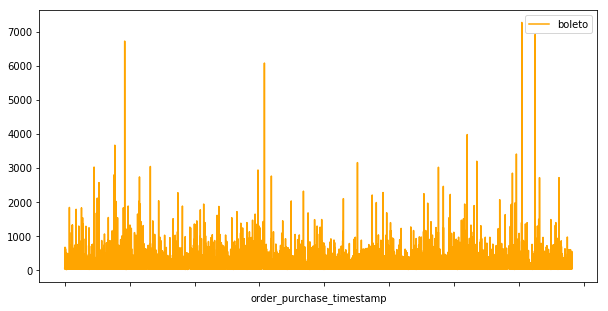

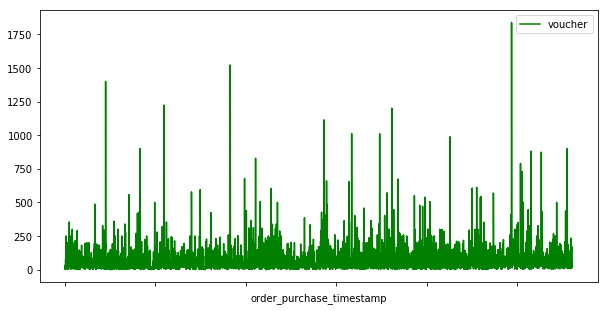

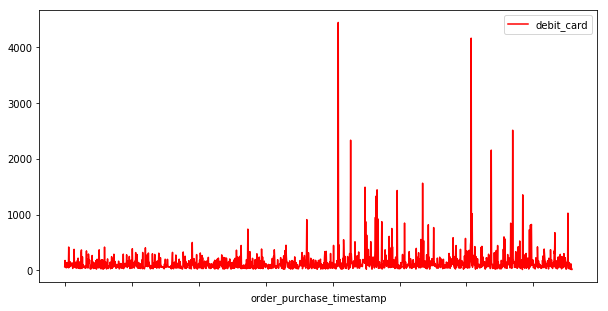

In [82]:
#Lista Comportamiento en el tiempo por Tipo de Pago


payment_orders.sort_values(by=['order_purchase_timestamp'], inplace=True)
listPaymentT = ['credit_card','boleto','voucher','debit_card']
color = ['Blue','Orange','Green','Red']
for i,var in enumerate(listPaymentT):
    #print(var)
    temp = payment_orders[(payment_orders['payment_type'] == var)][['order_purchase_timestamp','payment_value']]
    #plt.subplot(2,2,i+1)
#     temp.plot()
    temp.plot(figsize=(10, 5), kind='line',x='order_purchase_timestamp',y='payment_value', color=color[i] ,label = var)
    plt.tittle = 'Payment Type ' + var
    #plt.legend()
plt.show()

In [ ]:
## In Monthly bases Credit card payment has som changes in September, payments with boleto show some peak in may, july and november
## debit-card is mor used un Jun to august

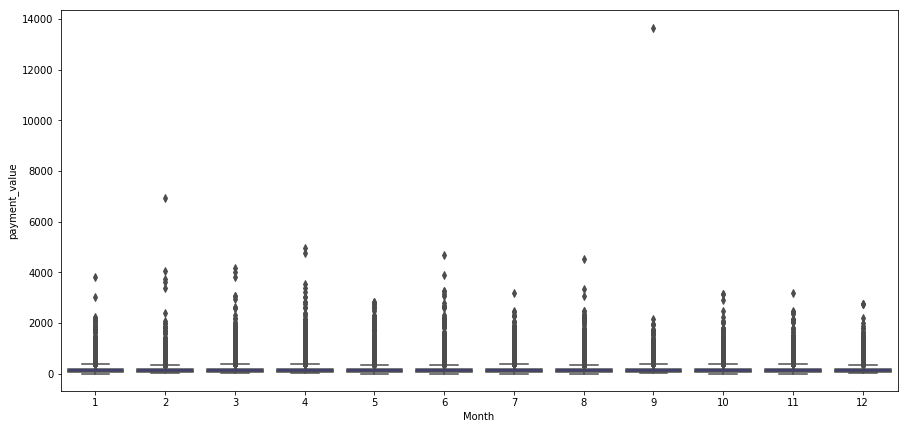

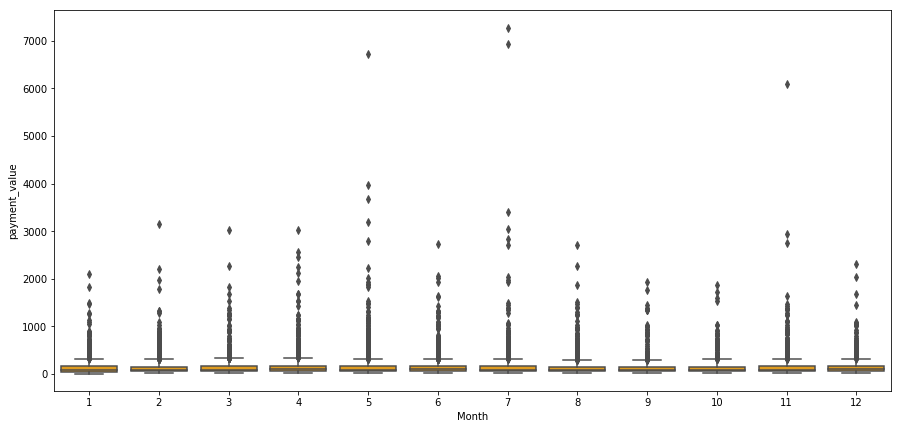

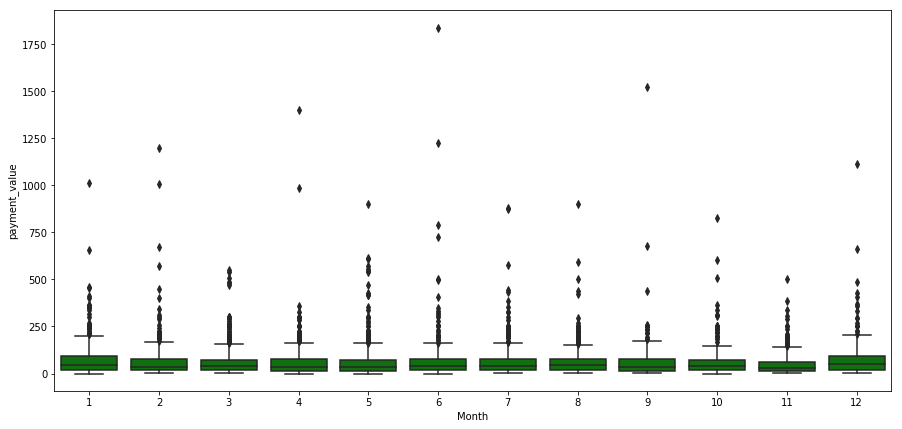

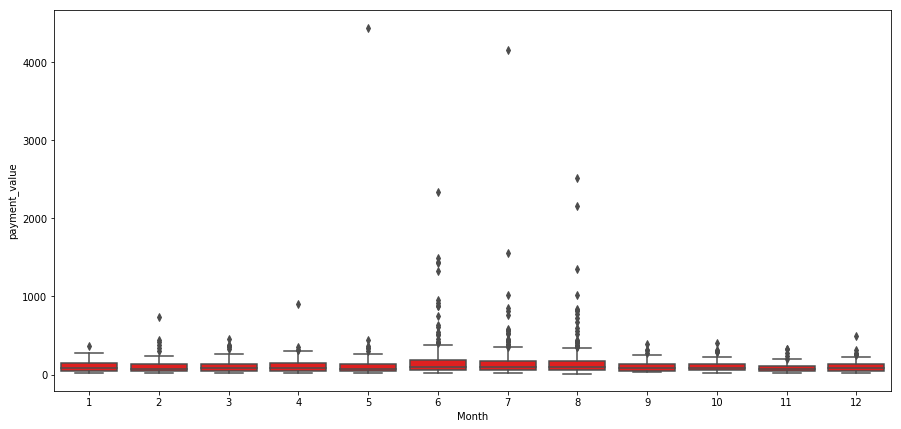

In [83]:
#Lista Comportamiento en el tiempo por Tipo de Pago

payment_orders.sort_values(by=['Month'], inplace=True)
listPaymentT = ['credit_card','boleto','voucher','debit_card']
color = ['Blue','Orange','Green','Red']

for i,var in enumerate(listPaymentT):
    plt.figure(figsize=(15, 7))
    #print(var)
    temp = payment_orders[(payment_orders['payment_type'] == var)][['Month','payment_value']]
    #plt.subplot(2,2,i+1)
    sns.boxplot(x='Month',y='payment_value', data=temp ,color=color[i])
    #plt.tittle = 'Payment Type ' + var
    #plt.legend()
    plt.show()

In [ ]:
## Thursday and Saturday shows peaks of buyers in credit card, boletos and bouchers are some disperse along week.

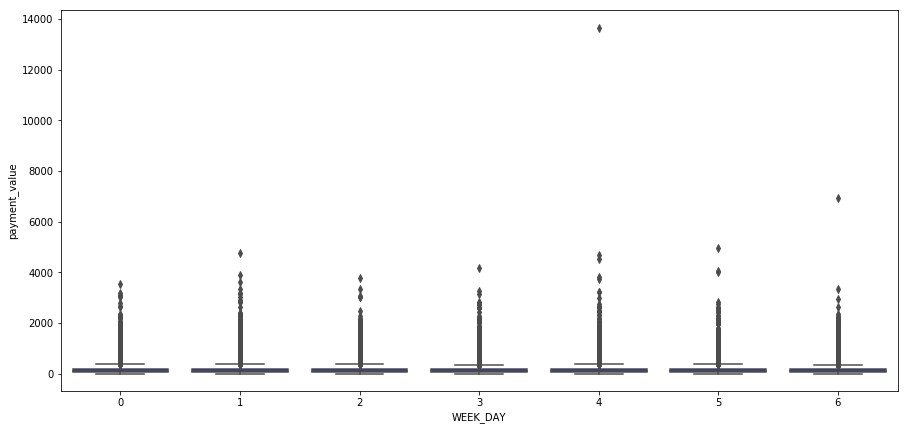

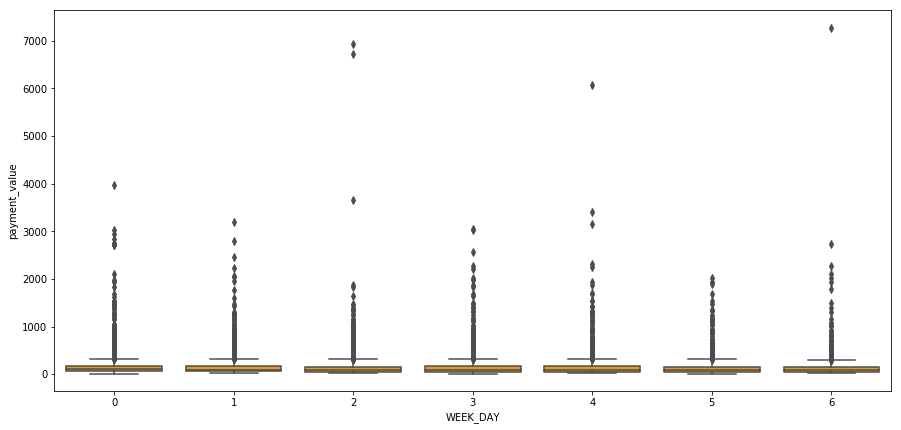

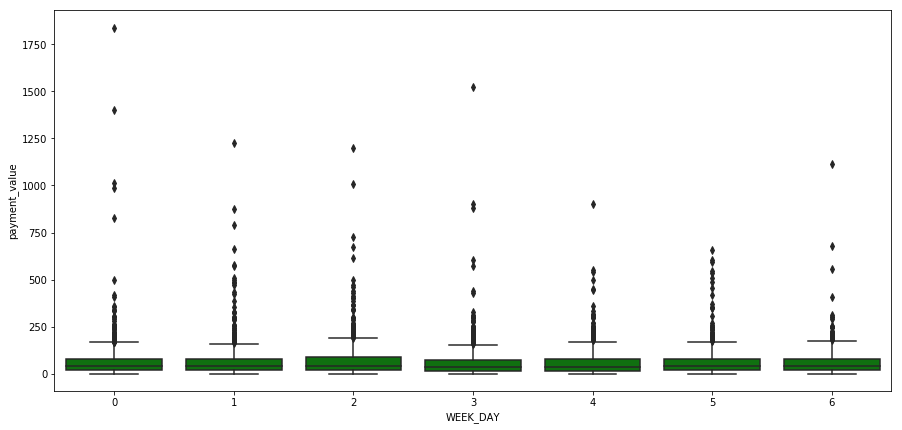

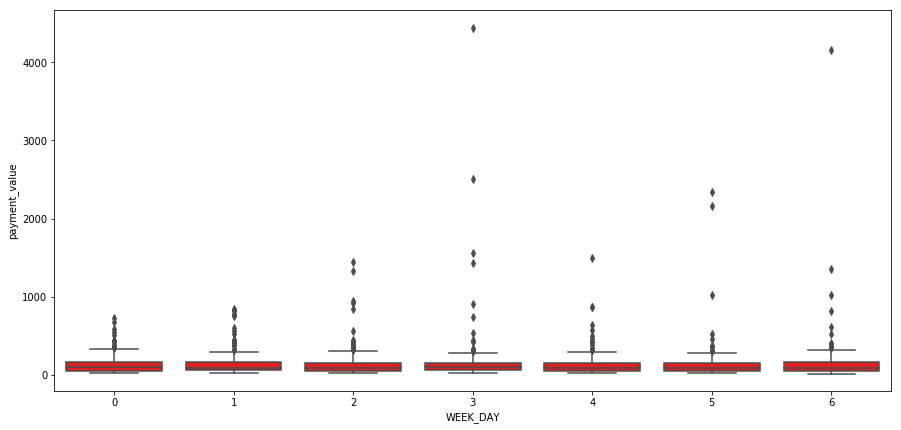

In [84]:
# payment_orders.sort_values(by=['WEEK_DAY'], inplace=True)
# listPaymentT = ['credit_card','boleto','voucher','debit_card']
# color = ['Red','Green','Blue','Orange']
# plt.figure(figsize=(10, 5))
# for i,var in enumerate(listPaymentT):
#     #print(var)
#     temp = payment_orders[(payment_orders['payment_type'] == var)][['WEEK_DAY','payment_value']]
#     #plt.subplot(2,2,i+1)
#     temp.plot(figsize=(10, 5),kind='line',x='WEEK_DAY',y='payment_value', color=color[i] ,label = var)
#     #plt.tittle = 'Payment Type ' + var
#     #plt.legend()
# plt.show()


payment_orders.sort_values(by=['WEEK_DAY'], inplace=True)
listPaymentT = ['credit_card','boleto','voucher','debit_card']
color = ['Blue','Orange','Green','Red']

for i,var in enumerate(listPaymentT):
    plt.figure(figsize=(15, 7))
    #print(var)
    temp = payment_orders[(payment_orders['payment_type'] == var)][['WEEK_DAY','payment_value']]
    #plt.subplot(2,2,i+1)
    sns.boxplot(x='WEEK_DAY',y='payment_value', data=temp ,color=color[i])
    #plt.tittle = 'Payment Type ' + var
    #plt.legend()
    plt.show()

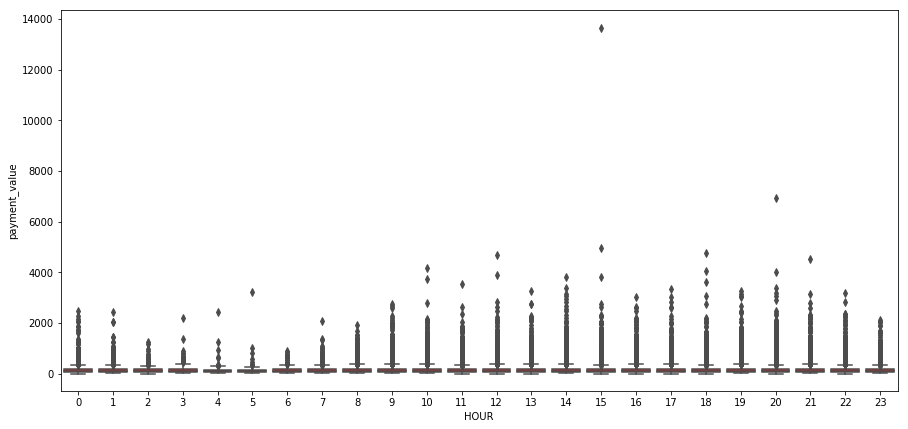

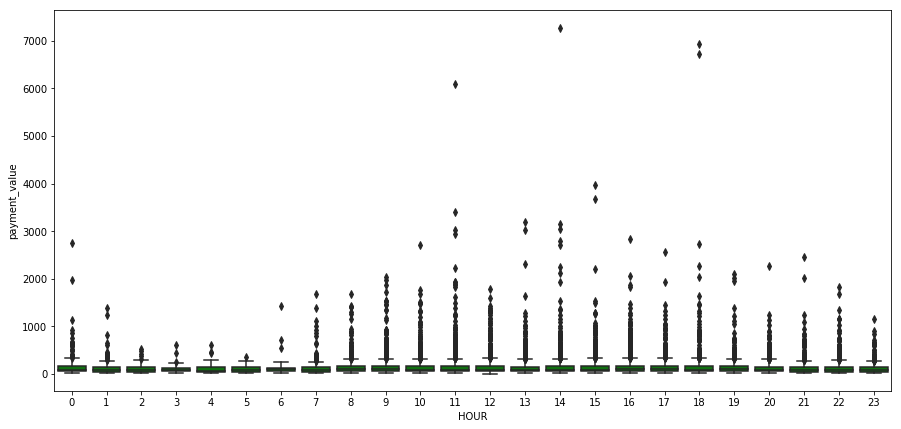

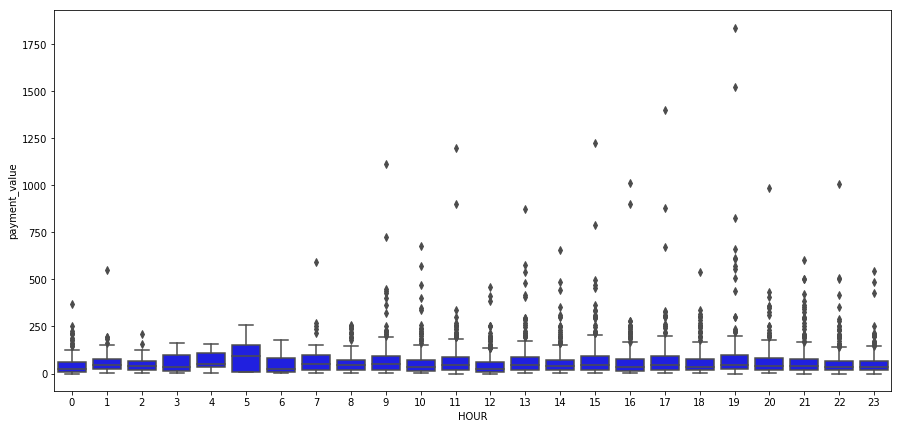

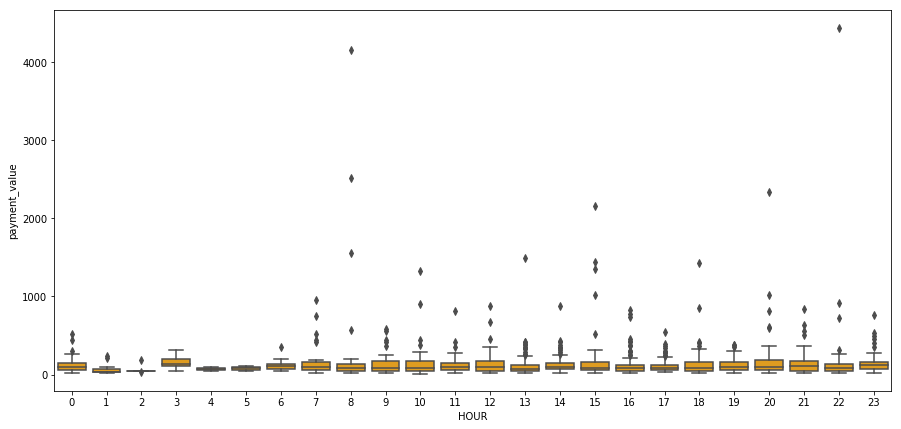

In [77]:
payment_orders.sort_values(by=['HOUR'], inplace=True)
listPaymentT = ['credit_card','boleto','voucher','debit_card']
color = ['Red','Green','Blue','Orange']

for i,var in enumerate(listPaymentT):
    #print(var)
    plt.figure(figsize=(15, 7))
    temp = payment_orders[(payment_orders['payment_type'] == var)][['HOUR','payment_value']]
    #plt.subplot(2,2,i+1)
    sns.boxplot(x='HOUR',y='payment_value', data=temp ,color=color[i])
    #plt.tittle = 'Payment Type ' + var
    #plt.legend()
    plt.show()


In [64]:
payment_orders.payment_type.unique()

array(['boleto', 'credit_card', 'voucher', 'debit_card'], dtype=object)

In [66]:
payment_orders[(payment_orders['payment_type'] == 'credit_card')].groupby('WEEK_DAY').sum()


,payment_sequential,payment_installments,payment_value,HOUR
WEEK_DAY,,,,
0,12202,42211,1982507.22,184158
1,11949,41376,1936532.55,179042
2,11735,40378,1887857.75,171833
3,11070,38781,1791388.23,162221
4,10778,37975,1780821.35,153841
5,8790,31569,1444093.84,129872
6,9698,33828,1526841.62,150730


In [85]:
type_loc_cross = pd.crosstab(payment_orders["payment_type"], payment_orders["Month"])
type_loc_cross

Month,1,2,3,4,5,6,7,8,9,10,11,12
payment_type,,,,,,,,,,,,
boleto,1692,1694,1925,1774,2015,1799,2041,2052,885,1031,1479,1152
credit_card,6031,6476,7617,7266,8272,7223,7738,8199,3244,3693,5812,4334
debit_card,118,81,107,123,80,208,262,310,43,54,67,63
voucher,472,416,590,569,604,560,629,518,280,302,382,291
